
# 1 - Regressao Linear Simples

Quando utilizamos os modelos de Regressão? Quando queremos prever uma variável contínua, isto é, um valor numérico.

Nesse exercício de hoje, iremos aprender um pouco mais sobre a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) utilizando um dataset próprio dela para aplicarmos dentro do modelo de Regressão Linear.

Em linhas gerais, o objetivo do exercício é você desenvolver um modelo de Regressão Linear **SIMPLES** (Apenas uma variável de entrada X e uma de saída Y) para modelar a precificação de casas em Boston nos Estados Unidos. 

Neste exercício você irá:
- Importar os dados e criar o Dataframe;
- Realizar um EDA
- Escolher 3 atributos para utilizar como X do modelo
- Treinar o modelo de Regressão Linear simples para cada atributo e avaliar qual melhor modelo.

Para acessar esses dados, basta seguir o passo a passo abaixo.

In [122]:
# Importação do dataset Boston House Pricing

from sklearn.datasets import load_boston #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


Dando uma olhada mais a fundo no tipo do dataset, vemos que ele é um *sklearn.utils.Bunch*, uma espécie de objeto do sklearn. Em seguida, acessaremos seus atributos e veremos o que eles significam.

In [123]:
# Verificando os atributos do objeto
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [124]:
# Acessando o atributos do objeto
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Dentro dos atributos, vemos que o dataset é composto são:
- 'data': Os dados numéricos do dataset;
- 'target': A variável alvo (O que queremos prever);
- 'feature_names': Nome das colunas;
- 'DESCR': Esse vocês irão acessar e descobrir;
- 'filename': Esse vocês irão acessar e descobrir.

Os pŕoximos passos agora é com você!

### 1 - 0 Criação do DataFrame


In [125]:
# Importação das bibliotecas
import pandas as pd

''' Descrições das colunas (Fornecidos no dataset['feature_names'])
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
'''

# Montagem do dataframe
df = pd.DataFrame(dataset.get('data'),columns=dataset.get('feature_names'))
df["PRICE"] = dataset.get('target')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Você deve então, com esse Dataset formado Escolher 3 dos 13 atributos para criar 3 modelos e averiguar qual destes é melhor para prever o Preço da casa. Como deve-se fazer isso? **EDA**

## 1 - 1 Importação das bibliotacas 

In [214]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #Ref: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")

## 1 - 2 EDA

Você deve escolher quais serão as 3 melhores colunas para utilizarmos através do EDA e não treinando 13 modelos.

### Primeiro contato

- Head
- Describe
- Info/ Valores ausentes

In [127]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [128]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [130]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### Análise Gráfica

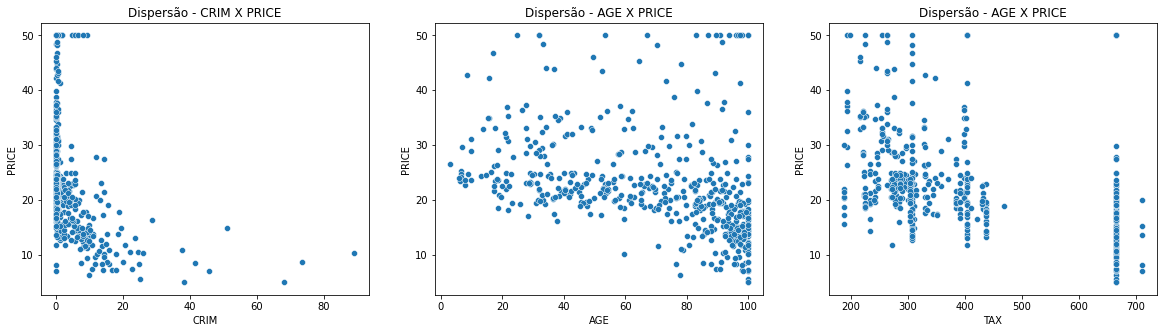

In [131]:
# Exploração dos dados de maneira visual, para ver quais 
#que provavelmente irão apresentar uma correlação (Não é o melhor método, mas é válido)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='CRIM', y='PRICE' ,data=df)
plt.title("Dispersão - CRIM X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='AGE', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='TAX', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.show()

### Gráfico de correlação e escolha do atributo

De todas as colunas do nosso Dataset, quais aqueles que provavelmente terá melhor desempenho no modelo? Aqueles que terão maior correlação com o Preço da casa (Tanto positiva quanto negativa)

<AxesSubplot:>

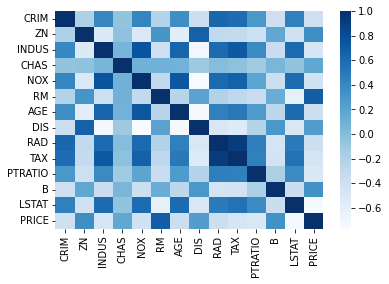

In [132]:
sns.heatmap(df.corr(),cmap="Blues")

In [133]:
df.corr()['PRICE'].abs().sort_values(ascending=False)

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

Baseado na análise de correlação, escolha 3 variáveis para utilizarmos como parâmetro de treinamento são:
RESPOSTA:
- LSTAT      0.737663
- RM         0.695360
- PTRATIO    0.507787

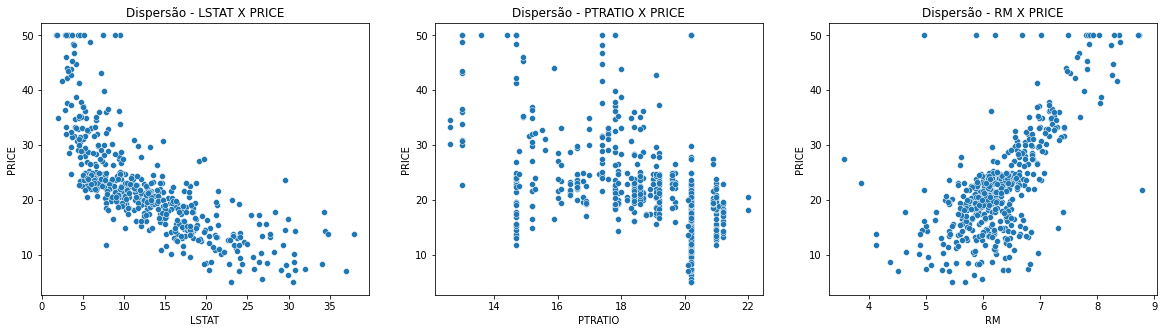

In [134]:
# Realizando a construção do gráfico de dispersão para os escolhidos

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='LSTAT', y='PRICE' ,data=df)
plt.title("Dispersão - LSTAT X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='PTRATIO', y='PRICE' ,data=df)
plt.title("Dispersão - PTRATIO X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='RM', y='PRICE' ,data=df)
plt.title("Dispersão - RM X PRICE")
plt.show()

### Comparação dos gráficos de dispersão

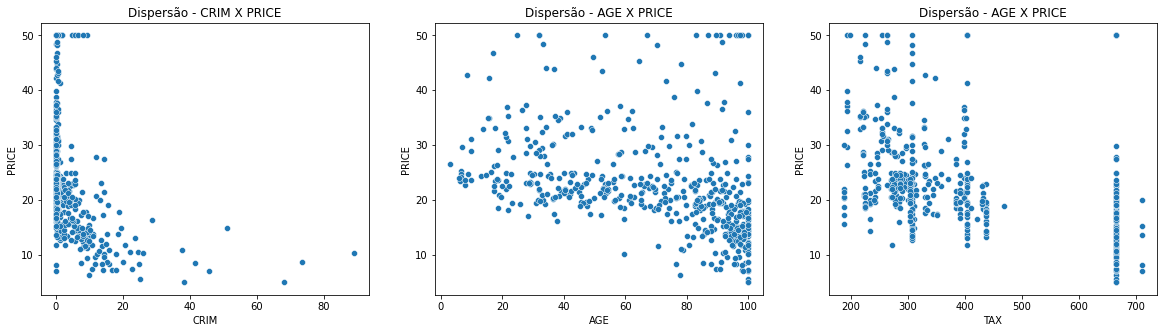

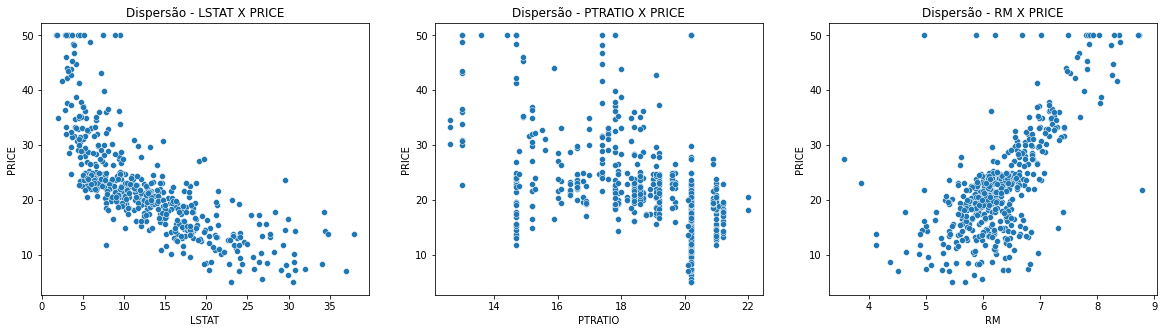

In [135]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='CRIM', y='PRICE' ,data=df)
plt.title("Dispersão - CRIM X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='AGE', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='TAX', y='PRICE' ,data=df)
plt.title("Dispersão - AGE X PRICE")


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='LSTAT', y='PRICE' ,data=df)
plt.title("Dispersão - LSTAT X PRICE")

plt.subplot(1,3,2)
sns.scatterplot(x='PTRATIO', y='PRICE' ,data=df)
plt.title("Dispersão - PTRATIO X PRICE")

plt.subplot(1,3,3)
sns.scatterplot(x='RM', y='PRICE' ,data=df)
plt.title("Dispersão - RM X PRICE")

plt.show()

Observando o gráfico de cima com os de baixo, é possível perceber uma maior lineariedade com os valores de baixo.

## 1 - 3 Separação Treino X Teste

In [136]:
# Separar os valores de atributo e alvo

X = df[['LSTAT','RM','PTRATIO']]
y = df['PRICE']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [137]:
X_train.head()

,LSTAT,RM,PTRATIO
87,8.44,6.121,18.5
435,23.27,6.629,20.2
485,10.58,6.312,20.2
88,5.50,7.007,17.8
293,8.58,6.127,16.0


## 1 - 4 Treinamentos e validação dos modelos

Atentar-se ao fato de que estamos analisando apenas modelos **SIMPLES** isto é um X e um Y

### Treinar o modelo

In [138]:

# Chamar a função do Modelo para cada variável
LinReg1 = LinearRegression() # Para o LSTAT
LinReg2 = LinearRegression() # Para o RM
LinReg3 = LinearRegression() # Para o PTRATIO

Tenta achar um jeito de resolver esse erro **ValueError** em baixo.

In [139]:
X_train['LSTAT'].values.reshape(-1,1)

array([[ 8.44],
       [23.27],
       [10.58],
       [ 5.5 ],
       [ 8.58],
       [ 4.73],
       [14.19],
       [ 6.86],
       [ 9.45],
       [16.03],
       [ 3.73],
       [12.12],
       [ 5.7 ],
       [ 9.81],
       [10.42],
       [28.32],
       [ 8.51],
       [ 3.57],
       [17.21],
       [ 2.96],
       [ 7.53],
       [ 6.36],
       [12.01],
       [18.06],
       [16.29],
       [ 6.65],
       [15.84],
       [11.38],
       [17.44],
       [12.03],
       [11.22],
       [15.03],
       [ 7.79],
       [14.1 ],
       [15.79],
       [18.03],
       [ 4.21],
       [34.77],
       [21.32],
       [12.13],
       [ 3.76],
       [ 4.45],
       [ 8.93],
       [26.82],
       [10.63],
       [13.99],
       [ 9.28],
       [24.91],
       [14.7 ],
       [10.5 ],
       [10.11],
       [ 5.81],
       [ 6.78],
       [ 6.62],
       [15.1 ],
       [ 6.36],
       [ 8.23],
       [ 9.47],
       [29.68],
       [13.45],
       [17.16],
       [15.17],
       [

In [140]:
# Treinar o modelo

LinReg1.fit(X_train['LSTAT'].values.reshape(-1,1),y_train)

LinearRegression()

### Calcular as métricas

- Fórmula da regressão
- MSE
- RMSE
- R²

In [141]:


# Predizer os valores de teste

y_pred_1 = LinReg1.predict(X_test['LSTAT'].values.reshape(-1,1))


# Calcular as métricas do modelo

print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))


Fórmula: y = 35.00768442758947 -0.9701447539477013 x
MSE: 4.407937258323748
RMSE: 31.176247468429036
R²: 0.5535440042867353


### Criar uma visualização do modelo


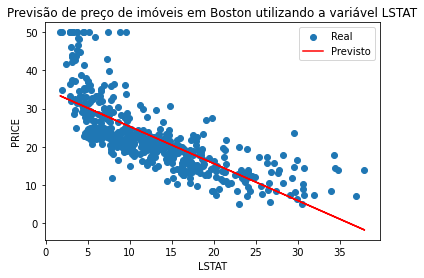

In [142]:

y_pred_total = LinReg1.predict(X['LSTAT'].values.reshape(-1,1))
plt.scatter('LSTAT','PRICE',data=df,label='Real')
plt.plot(df['LSTAT'],y_pred_total,label='Previsto',color='Red')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável LSTAT')
plt.legend()

plt.show()

### Repetir procedimento

Realizar o mesmo procedimento para as outras 2 variáveis

Fórmula: y = -33.59776247012114 8.954512206698256 x
MSE: 3.968149416733339
RMSE: 31.950945816725365
R²: 0.5424500224720121


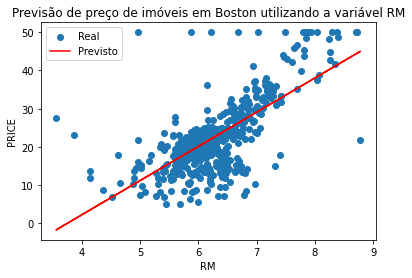

In [143]:
# Treinar o modelo

LinReg2.fit(X_train['RM'].values.reshape(-1,1),y_train)

# Predizer os valores de teste

y_pred_2 = LinReg2.predict(X_test['RM'].values.reshape(-1,1))


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg2.intercept_,LinReg2.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_2)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_2)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_2)))

y_pred_total = LinReg2.predict(X['RM'].values.reshape(-1,1))
plt.scatter('RM','PRICE',data=df,label='Real')
plt.plot(df['RM'],y_pred_total,label='Previsto',color='Red')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável RM')
plt.legend()

plt.show()


Fórmula: y = 63.82119495088388 -2.2260459842983154 x
MSE: 5.976655072623191
RMSE: 54.69789201812982
R²: 0.21670490109176355


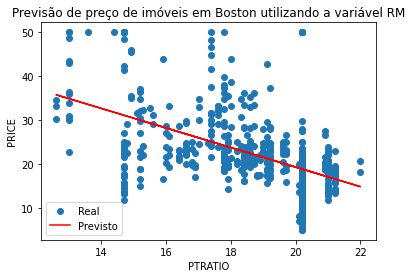

In [144]:
# Treinar o modelo

LinReg3.fit(X_train['PTRATIO'].values.reshape(-1,1),y_train)

# Predizer os valores de teste

y_pred_3 = LinReg3.predict(X_test['PTRATIO'].values.reshape(-1,1))


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg3.intercept_,LinReg3.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_3)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_3)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_3)))


y_pred_total = LinReg3.predict(X['PTRATIO'].values.reshape(-1,1))
plt.scatter('PTRATIO','PRICE',data=df,label='Real')
plt.plot(df['PTRATIO'],y_pred_total,label='Previsto',color='Red')
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.title('Previsão de preço de imóveis em Boston utilizando a variável RM')
plt.legend()

plt.show()


## 1 - 5 Qual o melhor modelo?

Analise graficamente e com as métricas para chegar na conslusão.

Fórmula: y = 35.00768442758947 -0.9701447539477013 x
MSE: 4.407937258323748
RMSE: 31.176247468429036
R²: 0.5535440042867353


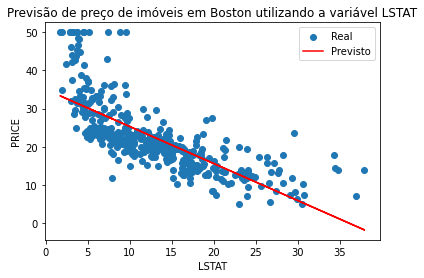

Fórmula: y = -33.59776247012114 8.954512206698256 x
MSE: 3.968149416733339
RMSE: 31.950945816725365
R²: 0.5424500224720121


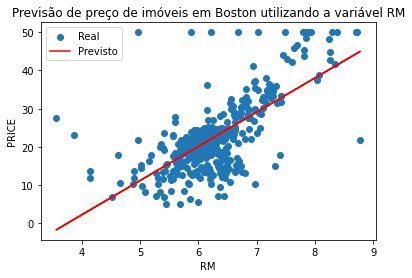

Fórmula: y = 63.82119495088388 -2.2260459842983154 x
MSE: 5.976655072623191
RMSE: 54.69789201812982
R²: 0.21670490109176355


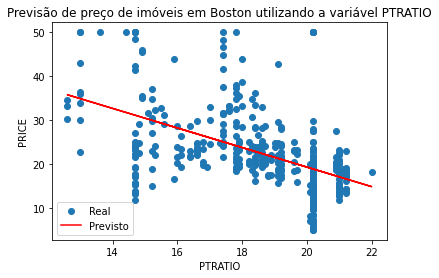

In [145]:
# Chamar a função do Modelo
LinReg = LinearRegression() # Para o LSTAT


for i in X.columns:
  # Treinar o modelo
  LinReg.fit(X_train[i].values.reshape(-1,1),y_train)

  # Predizer os valores de teste
  y_pred = LinReg.predict(X_test[i].values.reshape(-1,1))

  # Calcular as métricas do modelo
  print("Fórmula: y = {} {} x".format(LinReg.intercept_,LinReg.coef_[0]))
  print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
  print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
  print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

  #X_norm = scaler.transform(X[i])

  y_pred_total = LinReg.predict(X[i].values.reshape(-1,1))
  plt.scatter(X_train[i],y_train,label='Real')
  plt.plot(X[i],y_pred_total,label='Previsto',color='Red')
  plt.xlabel(i)
  plt.ylabel('PRICE')
  plt.title('Previsão de preço de imóveis em Boston utilizando a variável ' + i)
  plt.legend()

  plt.show()


O melhor modelo é aquele que utiliza o LSTAT.

# 2 - Regressao Linear Categórica

O dataset de hoje é o [Price Car](https://github.com/rmadan16/LinearRegression_CarPrice). Um dataset disponibilizado por [Rohit Madan](https://medium.com/@madanflies/linear-regression-on-carprice-dataset-or-encoding-a-categorical-dataset-in-linear-regression-7378f207e5c1). Para importar ele, basta utilizar o link: https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv' ou baixar o csv e fazer o upload no colab.

Ele contém a informação sobre a venda de carros usados e informações do carro como:
- Nome do carro
- Tipo de Combustível
- Número de portas
- Comprimento / Largura / Altura
- Outros variáveis
- Preço de venda

Nesse exercício você deverá aplicar o conceito de transformação categórica na coluna de **carbody** e desenvolver um modelo de Regressão Linear e avaliar seu desempenho.

## 2 - 0 Importação da bibliotecas

In [146]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression #Ref: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")


## 2 - 1 Criação do DataFrame filtragem da coluna

In [147]:
df = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [148]:
df = df[['carbody','price']]

2 - 2 Distribuição do preço de acordo com o carbody

In [149]:
df[['carbody']].value_counts()

carbody    
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
dtype: int64

In [150]:
df.head()

,carbody,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0


In [151]:
df.isnull().sum()

carbody    0
price      0
dtype: int64

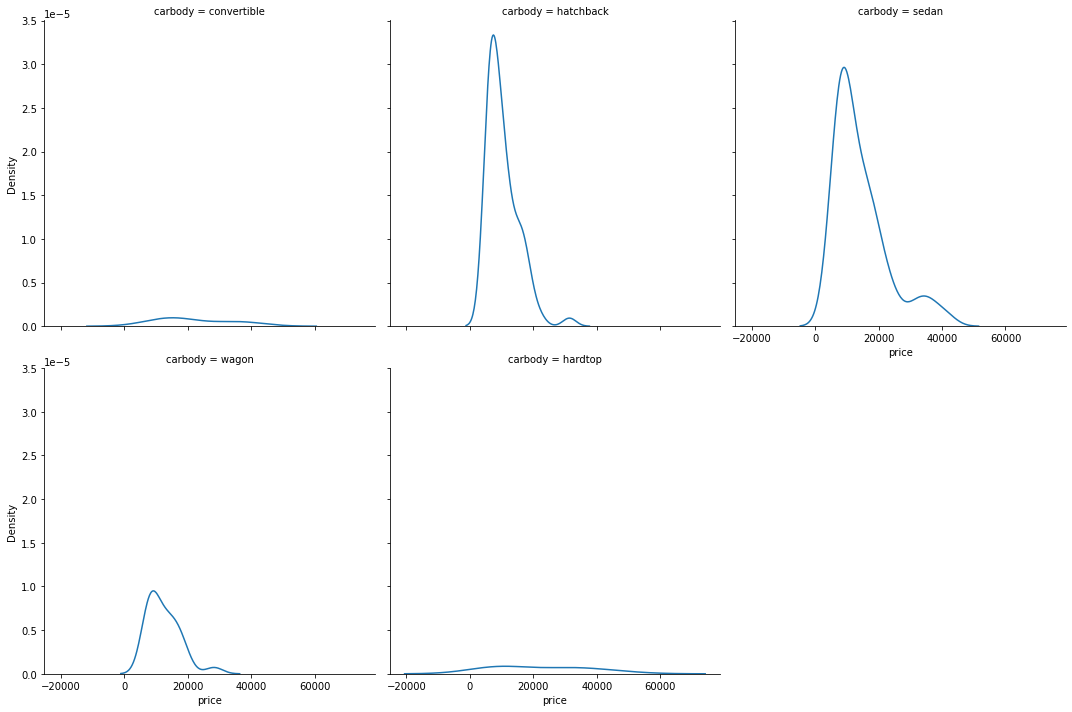

In [152]:
sns.displot(data = df,
            x = 'price',
            col = 'carbody',
            col_wrap = 3,
            kind = 'kde')

plt.show()

## 2 - 2 Transformações da variável categórica 

### Usando o get_dummies do pandas

In [153]:
df_tf = pd.get_dummies(df)
df_tf.columns=df_tf.columns.str.replace('carbody_','')
df_tf.head()

,price,convertible,hardtop,hatchback,sedan,wagon
0,13495.0,1,0,0,0,0
1,16500.0,1,0,0,0,0
2,16500.0,0,0,1,0,0
3,13950.0,0,0,0,1,0
4,17450.0,0,0,0,1,0


In [154]:
df_tf = pd.get_dummies(df['carbody'])
df_tf['price'] = df['price']
df_tf.head()

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0


### Usando o OneHotEncoder

Nota o dataframe final deste modelo deve ser igual ao do get_dummies

In [155]:
## one hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df['carbody'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [156]:
df_tf = pd.DataFrame(enc.transform(df['carbody'].values.reshape(-1,1)).toarray().astype(int),columns=enc.categories_)
df_tf['price'] = df['price']
df_tf.head()

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0


In [157]:
df_tf.head()

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0


## 2 - 3 Treinamento e validação do modelo

In [158]:
df_tf

,convertible,hardtop,hatchback,sedan,wagon,price
0,1,0,0,0,0,13495.0
1,1,0,0,0,0,16500.0
2,0,0,1,0,0,16500.0
3,0,0,0,1,0,13950.0
4,0,0,0,1,0,17450.0
...,...,...,...,...,...,...
200,0,0,0,1,0,16845.0
201,0,0,0,1,0,19045.0
202,0,0,0,1,0,21485.0
203,0,0,0,1,0,22470.0


### Separar Treino X Teste

In [159]:
X = df_tf.drop(df_tf['price'],axis=1)
X

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [160]:
# Separar os valores de atributo e alvo

X = df_tf.iloc[:,:-1]
y = df_tf[['price']]

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### Treinar modelo

In [161]:
# Chamar a função do Modelo para cada variável
LinReg1 = LinearRegression()

# Treinar o modelo

LinReg1.fit(X_train,y_train)

# Predizer os valores de teste

y_pred_1 = LinReg1.predict(X_test )


In [162]:
y2=pd.DataFrame(y_pred_1)
y1=pd.DataFrame(y_test)

In [163]:
y2.reset_index(drop=True, inplace=True)
y1.reset_index(drop=True, inplace=True)


In [164]:
predY = pd.concat([y1, y2],axis=1)
predY.columns = ['profReal', 'profPred']
predY

,profReal,profPred
0,11850.0,10700.030309
1,5348.0,10700.030309
2,8249.0,27738.333333
3,17199.0,10700.030309
4,34028.0,27738.333333
5,17669.0,19654.500000
6,15690.0,14052.310127
7,17450.0,14052.310127
8,8495.0,14052.310127
9,6795.0,10700.030309


In [165]:
y_pred_1[:5]

array([[10700.03030909],
       [10700.03030909],
       [27738.33333333],
       [10700.03030909],
       [27738.33333333]])

### Calcular métricas do modelo

In [166]:
# Calcular as métricas do modelo

print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1))))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))

Fórmula: y = [16897.40866684] [ 2757.09133316 10840.92466649 -6197.37835775 -2845.09854026
 -4555.53910163] x
MSE: 6302.583298988652
RMSE: 8601.21882568738
R²: 0.07959128134759907


# 3 - Ordinary Least Squares

Este [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) é um conjunto de dados fornecidos no [Kaggle](https://www.kaggle.com/), uma plataforma voltada a competição de programação e acesso à conjunto de dados de todo o mundo. É totalmente gratuito e apresenta uma forte comunidade de Cientistas de Dados e Machine Learning.

Sobre os dados, eles foram criados coletando dados sobre o consumo de cerveja na cidade de São Paulo na uma área universitária, cujos frequentadores eram, em sua média, estudantes entre 18 e 28 anos.

Esse dataset, apresenta as categorias como:

| Descrição
| ---
| Dia que o dado foi anotado
| Temperatura média do dia em ºC
| Temperatura mínima do dia em ºC
| Temperatura máxima do dia em ºC
| Quantos mm chuva caiu naquele dia
| Verificar se for Sábado ou Domingo
| Consumo de cerveja em litros

Neste exercício você deve:
- Importar os dados e criar o Dataframe
- Realizar a limpeza e manipulação dos dados
- Realizar um EDA
- Encontrar a correlação do consumo com a temperatura máxima
- Treinar o modelo de Regressão Linear **Ordinary Least Squares** utilizando a **temp_max**.


### 3 - 0 Importar Bibliotecas e CSV

In [168]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")




### 3 - 1 Criar o dataframe

Renomerar as colunas para facilitar o coding

In [193]:
# Lendo o nosso dataset
df = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Modelos Supervisionados\Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [194]:

# Renomeando as colunas para padronização e facilitação do código
columns = ['data','temp_med','temp_min','temp_max','precipitacao','fimsemana','consumo']
df.columns = columns

# Observando os 5 primeiros valores
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### 3 - 2 Análise Inicial

#### Informações gerais
- Número de dados
- Número de atributos
- Valores ausentes por coluna

In [173]:
df.describe()

,fimsemana,consumo
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [175]:
df.dtypes

data             object
temp_med         object
temp_min         object
temp_max         object
precipitacao     object
fimsemana       float64
consumo         float64
dtype: object

In [182]:
# Vamos ver algumas informações gerais sobre os dados:

print('Informações sobre o dataset: \n')
print('Número de dados: \t {}\n'.format(df.shape[0]))
print('Número de colunas: \t {}\n'.format(df.shape[1]))
print('Valores ausentes por coluna: \n{}\n'.format(df.isnull().sum()))
df.info()

Informações sobre o dataset: 

Número de dados: 	 941

Número de colunas: 	 7

Valores ausentes por coluna: 
data            576
temp_med        576
temp_min        576
temp_max        576
precipitacao    576
fimsemana       576
consumo         576
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


### 3 - 3  Data Cleaning

#### Valores Ausentes

In [185]:
df.tail(5)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
df_clean = df.copy()
df_clean.dropna(axis=0,inplace=True)
df_clean.tail(3)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


#### Converter dados corretamente

In [191]:
df2 = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Modelos Supervisionados\Consumo_cerveja.csv",decimal=',')
df2.dtypes

Data                            object
Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)     object
dtype: object

In [187]:
# Dtype = object -> Formato string
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [198]:
# Transformação da data para o formato datetime
df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")

# Transformação dos dados para tipo float
df_clean['temp_med']     = df_clean['temp_med'].str.replace(',','.').astype(float)
df_clean['temp_min']     = df_clean['temp_min'].str.replace(',','.').astype(float)
df_clean['temp_max']     = df_clean['temp_max'].str.replace(',','.').astype(float)
df_clean['precipitacao'] = df_clean['precipitacao'].str.replace(',','.').astype(float)

# - Outra forma - Utilizar no começo
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Portfolio/Consumo_cerveja.csv",decimal=",")

# Transformação dos dados para tipo int
df_clean['fimsemana'] = df_clean['fimsemana'].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   temp_med      365 non-null    float64       
 2   temp_min      365 non-null    float64       
 3   temp_max      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fimsemana     365 non-null    int32         
 6   consumo       365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 21.4 KB


In [189]:
df_clean.head(3)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814


### 3 - 4 EDA

#### Describe

In [199]:
display(df_clean.describe(include='all'))

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,NaN,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,NaN,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000


#### Gráfico de consumo x tempo

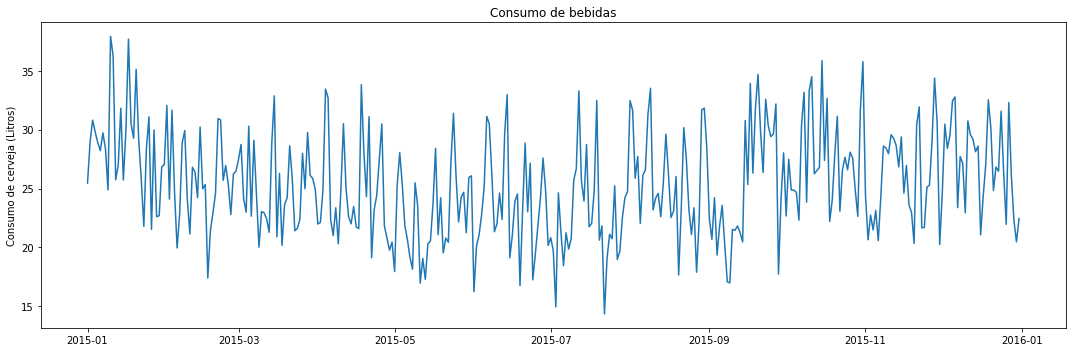

In [204]:
plt.figure(figsize=(15,5))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-');
plt.title('Consumo de bebidas')
plt.ylabel('Consumo de cerveja (Litros)')

plt.tight_layout()
plt.show()

#### Gráfico mostrando as flutuações das variáveis ao longo do tempo

O ideal é conseguir visualizar estas 4:
- temp_max
- temp_med
- temp_min
- consumo

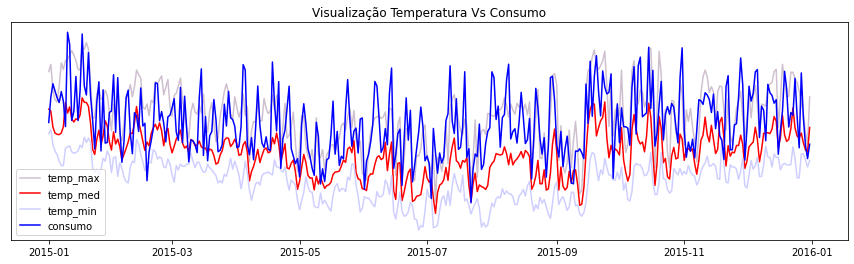

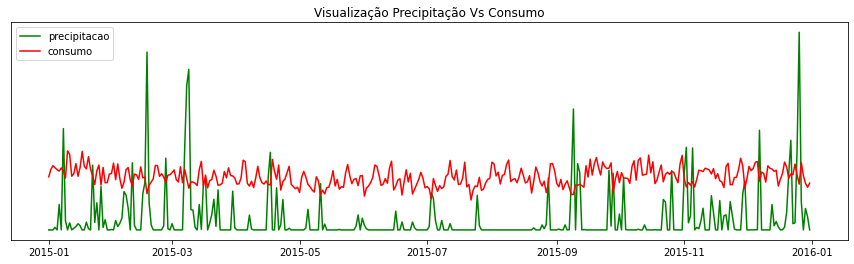

In [205]:
plt.figure(figsize=(15,4))
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot_date(x='data',y='temp_max',data=df_clean,fmt='-',c='#CFC0D0');
plt.plot_date(x='data',y='temp_med',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y='temp_min',data=df_clean,fmt='-',c='#CFCFFF');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='#0000FF');
plt.title("Visualização Temperatura Vs Consumo")
plt.legend()



plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='precipitacao',data=df_clean,fmt='-',c='g');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.title("Visualização Precipitação Vs Consumo")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

#### Gráfico de correlação

In [207]:
df_clean.corr()

,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
temp_med,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
precipitacao,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fimsemana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


consumo         1.000000
temp_max        0.642672
temp_med        0.574615
fimsemana       0.505981
temp_min        0.392509
precipitacao   -0.193784
Name: consumo, dtype: float64


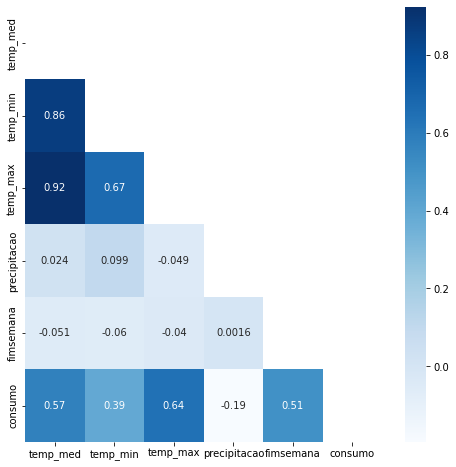

In [211]:
print(df_clean.corr()['consumo'].sort_values(ascending = False) )

correlation = df_clean.corr()

f, ax = plt.subplots(figsize=(8, 8))

# Cria uma máscara para camuflar a parte de cima do mapa

mask = np.triu(np.ones_like(correlation,dtype=bool))

# Plot do mapa de calor

sns.heatmap(correlation,cmap='Blues', mask=mask,square=False,annot=True);

### 3 - 5 Separar conjunto de Treino e Teste

In [225]:
# Separando o conjunto de dados em variáveis e target

X = df_clean['temp_max']
y = df_clean['consumo']

# Criação da amostra para treino e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=75)

### 3 - 6 Treinar o modelo OLS

In [226]:
# Especificação do modelo 
reg1 = sm.OLS(y_train, X_train)

# Executa o método dos mínimos quadrados
reg1fit = reg1.fit()

print(reg1fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                consumo   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.507e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):                   1.09e-252
Time:                        00:09:21   Log-Likelihood:                         -786.21
No. Observations:                 292   AIC:                                      1574.
Df Residuals:                     291   BIC:                                      1578.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 3 - 7 Validar o modelo

MSE: 3.0857298746118635
RMSE: 13.694795529185376
R²: 0.1807014078417758


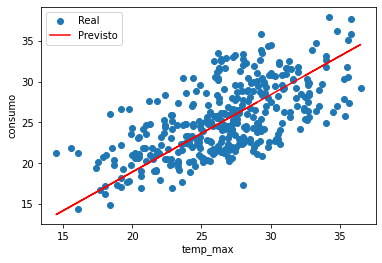

In [231]:
y_pred_1 = reg1fit.predict(X_test)

# Calcular as métricas do modelo

#print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))

y_pred_total = reg1fit.predict(X)
plt.scatter(X,y,label='Real')
plt.plot(X,y_pred_total,label='Previsto',color='r')
plt.xlabel('temp_max')
plt.ylabel('consumo')
plt.legend()

plt.show()


# 4 - Regressão Linear Múltipla

Iremos realizar a mesma análise do exercício de OL (3) com o [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) de consumo de cerveja na Cidade de São Paulo.

Além das etapas do exercício anterior, neste exercício você deve:
(Exercício antigo)
- Importar os dados e criar o Dataframe
- Realizar a limpeza e manipulação dos dados
- Realizar um EDA

(Exercício Novo)
- Treinar um modelo de regressão múltipla
- Tratar e transformar o dados
- Otimizar o modelo


### 4 - 0 Importar Bibliotecas e CSV

In [233]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler,StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")



### 4 - 1 Criar o dataframe

Renomerar as colunas para facilitar o coding

In [234]:
# Lendo o nosso dataset
# df = pd.read_csv("/content/Consumo_cerveja.csv")
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [235]:

# Renomeando as colunas para padronização e facilitação do código
columns = ['data','temp_med','temp_min','temp_max','precipitacao','fimsemana','consumo']
df.columns = columns

# Observando os 5 primeiros valores
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### 4 - 2 Análise Inicial

#### Informações gerais
- Número de dados
- Número de atributos
- Valores ausentes por coluna

In [236]:
# Vamos ver algumas informações gerais sobre os dados:

print('Informações sobre o dataset: \n')
print('Número de dados: \t {}\n'.format(df.shape[0]))
print('Número de colunas: \t {}\n'.format(df.shape[1]))
print('Valores ausentes por coluna: \n{}\n'.format(df.isnull().sum()))
df.info()

Informações sobre o dataset: 

Número de dados: 	 941

Número de colunas: 	 7

Valores ausentes por coluna: 
data            576
temp_med        576
temp_min        576
temp_max        576
precipitacao    576
fimsemana       576
consumo         576
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


### 4 - 3  Data Cleaning

#### Valores Ausentes

In [237]:
df.tail(5)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
df_clean = df.copy()
df_clean.dropna(axis=0,inplace=True)
df_clean.tail(3)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


#### Converter dados corretamente

In [239]:
# Dtype = object -> Formato string
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [240]:
# Transformação da data para o formato datetime
df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")

# Transformação dos dados para tipo float
df_clean['temp_med']     = df_clean['temp_med'].str.replace(',','.').astype(float)
df_clean['temp_min']     = df_clean['temp_min'].str.replace(',','.').astype(float)
df_clean['temp_max']     = df_clean['temp_max'].str.replace(',','.').astype(float)
df_clean['precipitacao'] = df_clean['precipitacao'].str.replace(',','.').astype(float)

# - Outra forma - Utilizar no começo
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Portfolio/Consumo_cerveja.csv",decimal=",")

# Transformação dos dados para tipo int
df_clean['fimsemana'] = df_clean['fimsemana'].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   temp_med      365 non-null    float64       
 2   temp_min      365 non-null    float64       
 3   temp_max      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fimsemana     365 non-null    int32         
 6   consumo       365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 21.4 KB


### 4 - 4 EDA

#### Describe

In [241]:
display(df_clean.describe(include='all'))

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,NaN,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,NaN,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000


#### Gráfico de consumo x tempo

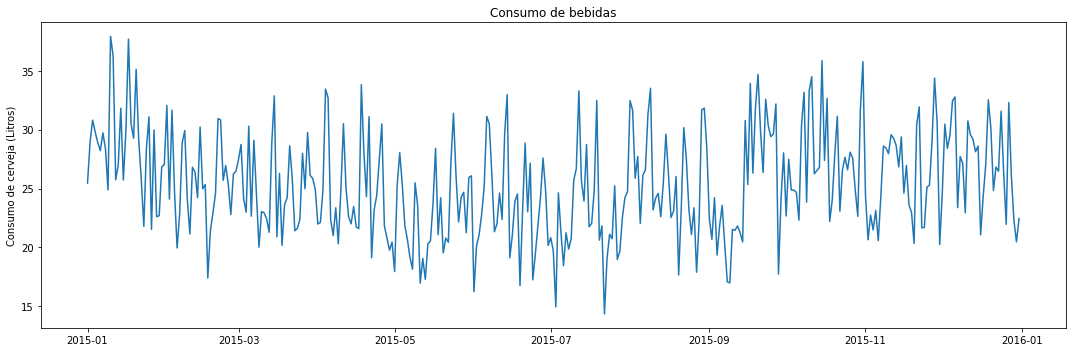

In [242]:
plt.figure(figsize=(15,5))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-');
plt.title('Consumo de bebidas')
plt.ylabel('Consumo de cerveja (Litros)')

plt.tight_layout()
plt.show()

#### Gráfico mostrando as flutuações das variáveis ao longo do tempo

O ideal é conseguir visualizar estas 4:
- temp_max
- temp_med
- temp_min
- consumo

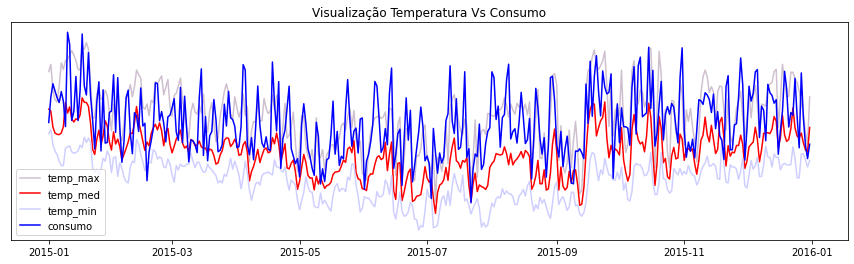

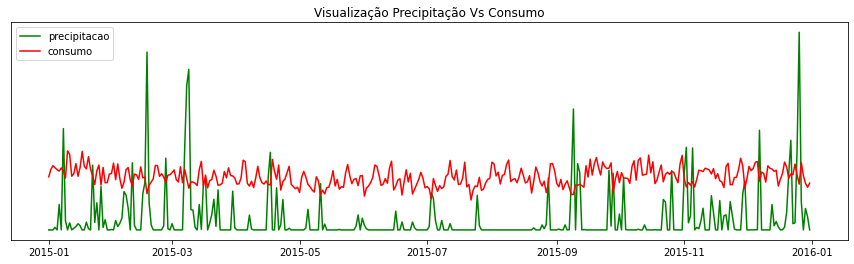

In [243]:
plt.figure(figsize=(15,4))
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot_date(x='data',y='temp_max',data=df_clean,fmt='-',c='#CFC0D0');
plt.plot_date(x='data',y='temp_med',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y='temp_min',data=df_clean,fmt='-',c='#CFCFFF');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='#0000FF');
plt.title("Visualização Temperatura Vs Consumo")
plt.legend()



plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='precipitacao',data=df_clean,fmt='-',c='g');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.title("Visualização Precipitação Vs Consumo")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

#### Gráfico de correlação

consumo         1.000000
temp_max        0.642672
temp_med        0.574615
fimsemana       0.505981
temp_min        0.392509
precipitacao   -0.193784
Name: consumo, dtype: float64


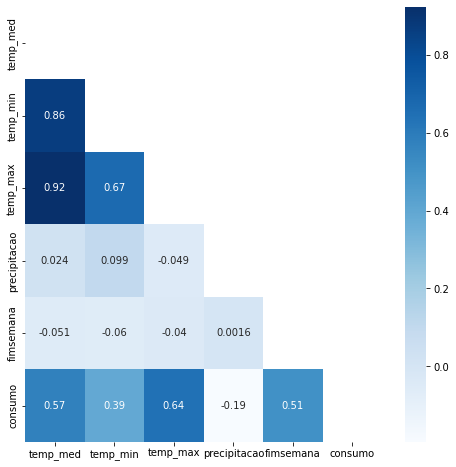

In [244]:
print(df_clean.corr()['consumo'].sort_values(ascending = False) )

correlation = df_clean.corr()

f, ax = plt.subplots(figsize=(8, 8))

# Cria uma máscara para camuflar a parte de cima do mapa

mask = np.triu(np.ones_like(correlation,dtype=bool))

# Plot do mapa de calor

sns.heatmap(correlation,cmap='Blues',mask=mask, square=False,annot=True);

### 4 - 5 Separar conjunto de Treino e Teste

In [245]:
# Separando o conjunto de dados em variáveis e target

X = df_clean[['data', 'temp_med', 'temp_min', 'temp_max', 'precipitacao', 'fimsemana']]
y = df_clean[['consumo']]

# Criação da amostra para treino e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=75)

In [251]:
X_train.head()


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,20.56,16.2,27.2,0.0,1
7,2015-01-08,24.90,19.5,32.8,48.6,0
339,2015-12-06,23.12,20.6,28.0,0.1,1
354,2015-12-21,23.12,19.6,29.1,27.2,0
191,2015-07-11,17.46,16.0,19.8,0.0,1


### 4 - 6 Criar os transformadores e transformar os dados (Separado)

A coluna **data** é apenas um indíce que nos auxilia a visualizar a evolução do consumo ao longo do tempo, porém ela não é utilizada nos transformadores e nem no treinamento / validação do modelo.

#### Criar os transformadores

In [252]:
# Chamar os modelos de transformação
min_max = MinMaxScaler()
norm = StandardScaler()

#### Treinar o StandardScaler()

In [253]:
for i in X_train.columns:
    print(i)

data
temp_med
temp_min
temp_max
precipitacao
fimsemana


In [257]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
for i in X_train_norm.columns:
  if i == 'data':
    pass
  else: 
    X_train_norm[i] = norm.fit_transform(X_train_norm[i].values.reshape(-1,1))
    X_test_norm[i] = norm.transform(X_test_norm[i].values.reshape(-1,1))

X_train_norm.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,-0.278386,-0.512593,0.084390,-0.425067,1.586843
7,2015-01-08,1.116713,0.680485,1.408720,3.231927,-0.630182
339,2015-12-06,0.544529,1.078178,0.273580,-0.417542,1.586843
354,2015-12-21,0.544529,0.716639,0.533717,1.621646,-0.630182
191,2015-07-11,-1.274884,-0.584900,-1.665617,-0.425067,1.586843


#### Treinar o MinMaxScaler()

In [258]:
X_train_min_max = X_train.copy()
X_test_min_max = X_test.copy()
for i in X_train_min_max.columns:
  if i == 'data':
    pass
  else:
    X_train_min_max[i] = min_max.fit_transform(X_train_min_max[i].values.reshape(-1,1))
    X_test_min_max[i] = min_max.transform(X_test_min_max[i].values.reshape(-1,1))

X_train_min_max.head()


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,0.479950,0.385185,0.596244,0.000000,1.0
7,2015-01-08,0.751880,0.629630,0.859155,0.512658,0.0
339,2015-12-06,0.640351,0.711111,0.633803,0.001055,1.0
354,2015-12-21,0.640351,0.637037,0.685446,0.286920,0.0
191,2015-07-11,0.285714,0.370370,0.248826,0.000000,1.0


### 4 - 7 Treinar e validar o modelo para os dados limpos (Sem transformação)

Lembrar de excluir a coluna de data para treinar o modelo

In [262]:
X_train.drop('data',axis=1).head(2)

,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,20.56,16.2,27.2,0.0,1
7,24.90,19.5,32.8,48.6,0


In [266]:
# Chamar o modelo
LinReg = LinearRegression()

# Treinar o modelo
LinReg.fit(X_train.drop('data',axis=1),y_train)

# Predizer os valores de teste
y_pred = LinReg.predict(X_test.drop('data',axis=1))


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg.intercept_,LinReg.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [6.16138335] [ 0.05198575 -0.03504732  0.6617024  -0.05541184  5.18728834] x
MSE: 1.92474251500698
RMSE: 4.955697851338489
R²: 0.7035226802685474


### 4 - 8 Treinar e validar o modelo para os dados com MinMaxScaler

Lembrar de excluir a coluna de data para treinar o modelo

In [270]:
# Chamar o modelo
LinReg_mim_max = LinearRegression()

# Treinar o modelo
LinReg_mim_max.fit(X_train_min_max.iloc[:,1:],y_train)

# Predizer os valores de teste
y_pred = LinReg_mim_max.predict(X_test_min_max.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg_mim_max.intercept_,LinReg_mim_max.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [16.04116379] [ 0.82969252 -0.47313884 14.09426118 -5.25304253  5.18728834] x
MSE: 1.9247425150069806
RMSE: 4.95569785133849
R²: 0.7035226802685473


### 4 - 9 Treinar e validar o modelo para os dados com StandardScaler()

Lembrar de excluir a coluna de data para treinar o modelo

In [271]:
# Chamar o modelo
LinReg_norm = LinearRegression()

# Treinar o modelo
LinReg_norm.fit(X_train_norm.iloc[:,1:],y_train,)

# Predizer os valores de teste
y_pred = LinReg_norm.predict(X_test_norm.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg_norm.intercept_,LinReg_norm.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [25.58140068] [ 0.16172206 -0.0969393   2.7980446  -0.73640132  2.33975146] x
MSE: 1.9247425150069803
RMSE: 4.955697851338489
R²: 0.7035226802685474


#

In [273]:
X.head(1)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
0,2015-01-01,27.3,23.9,32.5,0.0,0


In [274]:
# Montar dataframes com as informações gerais e previsões em todos os casos
df = X.copy()
df['consumo_real'] = y
df['consumo_previsto'] = LinReg.predict(X.drop('data',axis=1))
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,28.248291
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,28.874409
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,31.638800
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,30.699967
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,25.389868


In [ ]:
# X_train_min_max = X_train.copy()
# X_test_min_max = X_test.copy()
# for i in X_train_min_max.columns:
#   if i == 'data':
#     pass
#   else:
#     X_train_min_max[i] = min_max.fit_transform(X_train_min_max[i].values.reshape(-1,1))
#     X_test_min_max[i] = min_max.transform(X_test_min_max[i].values.reshape(-1,1))

# X_train_min_max.head()


In [289]:
df_min_max = X.copy()
for i in df_min_max.columns:
  if i == 'data':
    pass
  else:
    min_max.fit(X_train[i].values.reshape(-1,1))
    df_min_max[i] = min_max.transform(df_min_max[i].values.reshape(-1,1))


df_min_max['consumo_real'] = y
df_min_max['consumo_previsto'] = LinReg_mim_max.predict(df_min_max.drop(['data','consumo_real'],axis=1))
df_min_max.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,0.902256,0.955556,0.845070,0.000000,0.0,25.461,28.248291
1,2015-01-02,0.884712,1.000000,0.892019,0.000000,0.0,28.972,28.874409
2,2015-01-03,0.746867,0.844444,0.723005,0.000000,1.0,30.814,31.638800
3,2015-01-04,0.694236,0.777778,0.661972,0.012658,1.0,29.799,30.699967
4,2015-01-05,0.684211,0.740741,0.647887,0.000000,0.0,28.900,25.389868


In [290]:
df_norm = X.copy()
for i in df_norm.columns:
  if i == 'data':
    pass
  else:
    norm.fit(X_train[i].values.reshape(-1,1))
    df_norm[i] = norm.transform(df_norm[i].values.reshape(-1,1))


df_norm['consumo_real'] = y
df_norm['consumo_previsto'] = LinReg_norm.predict(df_norm.iloc[:,1:-1])
df_norm.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,1.888195,2.271256,1.337774,-0.425067,-0.630182,25.461,28.248291
1,2015-01-02,1.798189,2.488180,1.574261,-0.425067,-0.630182,28.972,28.874409
2,2015-01-03,1.090996,1.728948,0.722906,-0.425067,1.586843,30.814,31.638800
3,2015-01-04,0.820977,1.403563,0.415473,-0.334771,1.586843,29.799,30.699967
4,2015-01-05,0.769545,1.222794,0.344527,-0.425067,-0.630182,28.900,25.389868


In [ ]:
df_min_max.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,0.902256,0.955556,0.845070,0.000000,0.0,25.461,28.248291
1,2015-01-02,0.884712,1.000000,0.892019,0.000000,0.0,28.972,28.874409
2,2015-01-03,0.746867,0.844444,0.723005,0.000000,1.0,30.814,31.638800
3,2015-01-04,0.694236,0.777778,0.661972,0.012658,1.0,29.799,30.699967
4,2015-01-05,0.684211,0.740741,0.647887,0.000000,0.0,28.900,25.389868


In [292]:
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,28.248291
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,28.874409
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,31.638800
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,30.699967
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,25.389868


### 4 - 10 Criar gráficos de comparação dos modelos

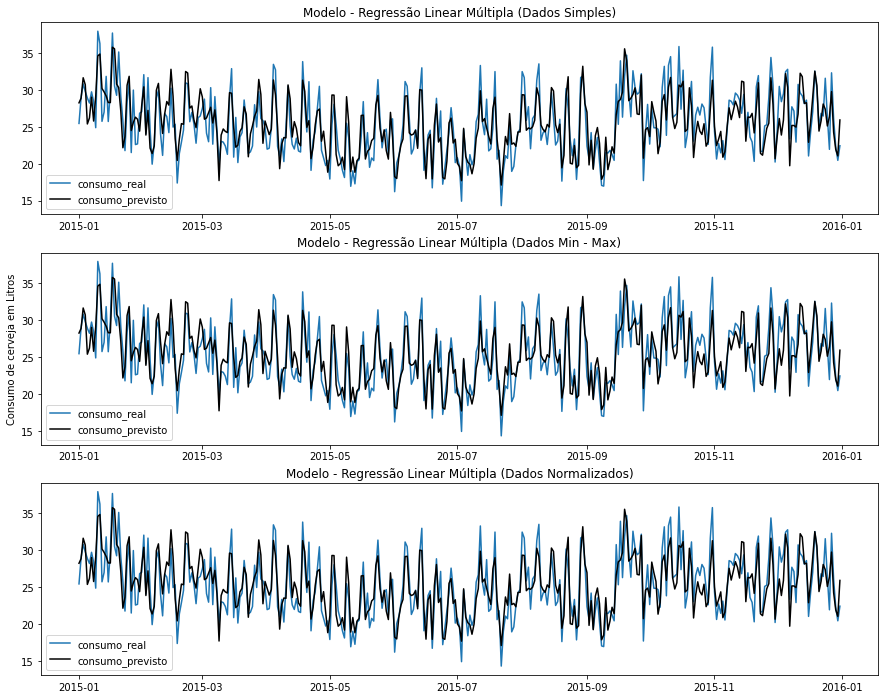

In [319]:
plt.figure(figsize=(15,12))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,1)
plt.plot_date(x='data',y='consumo_real',data=df,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df,fmt='-',color='black')
plt.title('Modelo - Regressão Linear Múltipla (Dados Simples)')
plt.legend()

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,2)
plt.plot_date(x='data',y='consumo_real',data=df_min_max,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df_min_max,fmt='-',color='black')
plt.title('Modelo - Regressão Linear Múltipla (Dados Min - Max)')
plt.ylabel('Consumo de cerveja em Litros')
plt.legend()

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,3)
plt.plot_date(x='data',y='consumo_real',data=df_norm,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df_min_max,fmt='-',color='black')
plt.title('Modelo - Regressão Linear Múltipla (Dados Normalizados)')
plt.legend()
plt.show()


In [316]:
teste={'dif1':df['consumo_previsto'] - df_min_max['consumo_previsto'],'dif2':df['consumo_previsto'] - df_norm['consumo_previsto']}
teste1=pd.DataFrame(teste)
teste1=teste1.sort_values(by='dif1',ascending=True).reset_index(drop=True)
teste1

,dif1,dif2
0,-1.421085e-14,-7.105427e-15
1,-1.421085e-14,-3.552714e-15
2,-1.421085e-14,-3.552714e-15
3,-1.421085e-14,-7.105427e-15
4,-1.421085e-14,-7.105427e-15
...,...,...
360,1.421085e-14,1.065814e-14
361,1.776357e-14,1.065814e-14
362,1.776357e-14,0.000000e+00
363,1.776357e-14,1.065814e-14


In [309]:
teste1.sort_values(by='dif1',ascending=True).head()

,dif1,dif2
19,-1.421085e-14,-7.105427e-15
1,-1.421085e-14,-3.552714e-15
357,-1.421085e-14,-3.552714e-15
8,-1.421085e-14,-7.105427e-15
18,-1.421085e-14,-7.105427e-15
